In [1]:
import pandas as pd
import numpy as np

In [2]:
import pydotplus as pydotplus
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data inputation

## Analyze column contents

In [3]:
print("Percentage of 0s")
print("Pregnancies: ", df[df.Pregnancies == 0].Pregnancies.count()/df.Pregnancies.count(), "%")
print("Glucose: ", df[df.Glucose == 0].Glucose.count()/df.Glucose.count(), "%")
print("BloodPressure: ", df[df.BloodPressure == 0].BloodPressure.count()/df.Glucose.count(), "%")
print("SkinThickness: ", df[df.SkinThickness == 0].SkinThickness.count()/df.SkinThickness.count(), "%")
print("Insulin: ", df[df.Insulin == 0].Insulin.count()/df.Insulin.count(), "%")
print("BMI: ", df[df.BMI == 0].BMI.count()/df.BMI.count(), "%")
print("DiabetesPedigreeFunction: ", df[df.DiabetesPedigreeFunction == 0].DiabetesPedigreeFunction.count()/df.DiabetesPedigreeFunction.count(), "%")
print("Age: ", df[df.Age == 0].Age.count()/df.Age.count(), "%")

Percentage of 0s
Pregnancies:  0.14453125 %
Glucose:  0.006510416666666667 %
BloodPressure:  0.045572916666666664 %
SkinThickness:  0.2955729166666667 %
Insulin:  0.4869791666666667 %
BMI:  0.014322916666666666 %
DiabetesPedigreeFunction:  0.0 %
Age:  0.0 %


In [4]:
print("Mean value (not counting the 0s)")
print("Pregnancies: ", df[df.Pregnancies != 0].Pregnancies.mean())
print("Glucose: ",df[df.Glucose != 0].Glucose.mean())
print("BloodPressure: ", df[df.BloodPressure != 0].BloodPressure.mean())
print("SkinThickess: ", df[df.SkinThickness != 0].SkinThickness.mean())
print("Insulin: ", df[df.Insulin != 0].Insulin.mean())
print("BMI: ", df[df.BMI != 0].BMI.mean())

Mean value (not counting the 0s)
Pregnancies:  4.494672754946728
Glucose:  121.6867627785059
BloodPressure:  72.40518417462484
SkinThickess:  29.153419593345657
Insulin:  155.5482233502538
BMI:  32.457463672391015


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Fill all the 0 values in Glucose, BloodPressure, SkinThickness, Insulin and BMI with the mean value of the observations where the value isn't 0

In [6]:
df.Glucose = df.Glucose.replace(0, df[df.Glucose != 0].Glucose.mean())
df.BloodPressure = df.BloodPressure.replace(0, df[df.BloodPressure != 0].BloodPressure.mean())
df.SkinThickness = df.SkinThickness.replace(0, df[df.SkinThickness != 0].SkinThickness.mean())
df.Insulin = df.Insulin.replace(0, df[df.Insulin != 0].Insulin.mean())
df.BMI = df.BMI.replace(0, df[df.BMI != 0].BMI.mean())

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Scaling the data

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


## Separate into Test and Train Datasets

In [11]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df_scaled, test_size=0.25)

In [12]:
df_scaled.shape

(768, 9)

In [13]:
test = df_scaled.sample(n=300, random_state=200)
test.shape

(300, 9)

In [14]:
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.218235,0.495019,0.491881,0.248700,0.171112,0.293738,0.169129,0.208278,0.310000
std,0.198412,0.196492,0.121759,0.105072,0.112388,0.150133,0.144939,0.204939,0.463266
min,0.000000,0.109677,0.061224,0.000000,0.000000,0.000000,0.002562,0.000000,0.000000
25%,0.058824,0.354839,0.408163,0.206522,0.127404,0.188139,0.068211,0.050000,0.000000
50%,0.176471,0.464516,0.493930,0.240798,0.170130,0.282209,0.119769,0.133333,0.000000
75%,0.352941,0.608065,0.571429,0.282609,0.170130,0.376278,0.234415,0.333333,1.000000
max,0.882353,0.993548,0.918367,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
train = df_scaled.drop(test.index)
train.shape

(468, 9)

In [16]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,0.231272,0.505170,0.495244,0.235733,0.169501,0.290170,0.167571,0.201282,0.373932
std,0.198126,0.196385,0.124604,0.088666,0.095198,0.134273,0.139358,0.190228,0.484364
min,0.000000,0.000000,0.000000,0.000000,0.001202,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.361290,0.408163,0.184783,0.133413,0.194274,0.072481,0.050000,0.000000
50%,0.176471,0.480645,0.489796,0.240798,0.170130,0.291564,0.128096,0.133333,0.000000
75%,0.352941,0.632258,0.571429,0.271739,0.170130,0.374744,0.233454,0.316667,1.000000
max,1.000000,1.000000,1.000000,0.576087,0.877404,0.799591,0.961144,0.816667,1.000000


In [17]:
len(train[train.Outcome  == 1])

175

In [18]:
len(train[train.Outcome  == 0])

293

Our objective will be to have 350 each, so that makes 700, which will be the 70% of our data.

In [19]:
train_extra_1 = train[train.Outcome == 1].sample(n = 350 - len(train[train.Outcome == 1]), random_state=200, replace = True)
train_extra_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0
mean,0.269580,0.648371,0.520748,0.261628,0.203473,0.339387,0.221415,0.257905,1.0
std,0.200055,0.194185,0.122344,0.082724,0.113142,0.122315,0.175188,0.164408,0.0
min,0.000000,0.219355,0.163265,0.054348,0.018029,0.096115,0.021349,0.000000,1.0
25%,0.058824,0.498990,0.459184,0.239130,0.170130,0.249489,0.111870,0.125000,1.0
50%,0.235294,0.632258,0.510204,0.240798,0.170130,0.327198,0.154996,0.250000,1.0
75%,0.411765,0.816129,0.591837,0.293478,0.199519,0.420245,0.276687,0.366667,1.0
max,0.764706,1.000000,0.877551,0.456522,0.679087,0.697342,0.943638,0.666667,1.0


In [20]:
train_extra_0 = train[train.Outcome == 0].sample(n = 350 - len(train[train.Outcome == 0]),random_state=200)
train_extra_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0
mean,0.215686,0.418676,0.487290,0.231751,0.161330,0.250980,0.152449,0.177485,0.0
std,0.185462,0.154708,0.117494,0.093267,0.097354,0.136865,0.115559,0.183265,0.0
min,0.000000,0.077419,0.244898,0.032609,0.001202,0.000000,0.009394,0.000000,0.0
25%,0.058824,0.322581,0.408163,0.173913,0.109375,0.130879,0.076857,0.016667,0.0
50%,0.117647,0.406452,0.489796,0.240798,0.170130,0.259714,0.110589,0.116667,0.0
75%,0.294118,0.496774,0.571429,0.271739,0.170130,0.351738,0.186166,0.266667,0.0
max,0.705882,0.870968,0.714286,0.413043,0.560096,0.570552,0.564475,0.700000,0.0


In [21]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,0.231272,0.505170,0.495244,0.235733,0.169501,0.290170,0.167571,0.201282,0.373932
std,0.198126,0.196385,0.124604,0.088666,0.095198,0.134273,0.139358,0.190228,0.484364
min,0.000000,0.000000,0.000000,0.000000,0.001202,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.361290,0.408163,0.184783,0.133413,0.194274,0.072481,0.050000,0.000000
50%,0.176471,0.480645,0.489796,0.240798,0.170130,0.291564,0.128096,0.133333,0.000000
75%,0.352941,0.632258,0.571429,0.271739,0.170130,0.374744,0.233454,0.316667,1.000000
max,1.000000,1.000000,1.000000,0.576087,0.877404,0.799591,0.961144,0.816667,1.000000


In [22]:
train_final = train.append(train_extra_1).append(train_extra_0)
train_final.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.239580,0.533927,0.500973,0.241882,0.177328,0.299283,0.179801,0.213500,0.500000
std,0.198146,0.204906,0.123855,0.088227,0.101161,0.133861,0.149262,0.185189,0.500358
min,0.000000,0.000000,0.000000,0.000000,0.001202,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.380645,0.428571,0.195652,0.141827,0.203988,0.077284,0.050000,0.000000
50%,0.176471,0.503226,0.493930,0.240798,0.170130,0.298569,0.138343,0.166667,0.500000
75%,0.411765,0.670968,0.571429,0.282609,0.170130,0.380368,0.242208,0.333333,1.000000
max,1.000000,1.000000,1.000000,0.576087,0.877404,0.799591,0.961144,0.816667,1.000000


In [23]:
#To create data

#train_final.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)

#To read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0


# Naive Bayes

## Train data

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [25]:
data = np.array(train_final[train_final.columns[:-1]])
target = np.array(train_final[train_final.columns[-1]])

In [26]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
2,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
3,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
4,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0


In [27]:
def runprediction(data, target):
    #Fit data to model
    model.fit(data, target)
    #Run prediction
    expected = target
    predicted = model.predict(data)
    #Print results
    print(type(model).__name__, metrics.accuracy_score(expected, predicted))
    print()
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print() 

In [28]:
#Select model to use
model = GaussianNB() #Best result
#model = MultinomialNB()
#model = BernoulliNB()

#Decide which model is the best using the cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data, target, cv = 10, scoring = 'accuracy')
print("Individual scores: ", scores)
print("Mean score: ", scores.mean())

Individual scores:  [0.67142857 0.75714286 0.7        0.71428571 0.75714286 0.72857143
 0.74285714 0.67142857 0.77142857 0.72857143]
Mean score:  0.7242857142857142


## Test model

In [29]:
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.529412,0.780645,0.653061,0.240798,0.170130,0.249489,0.095645,0.466667,1.0
1,0.588235,0.432258,0.469388,0.217391,0.170130,0.190184,0.026900,0.316667,1.0
2,0.058824,0.361290,0.428571,0.239130,0.218750,0.282209,0.156277,0.350000,0.0
3,0.058824,0.522581,0.265306,0.358696,0.183894,0.308793,0.377455,0.116667,1.0
4,0.117647,0.658065,0.493930,0.240798,0.170130,0.190184,0.069172,0.116667,1.0


In [30]:
data = np.array(test[test.columns[:-1]])
target = np.array(test[test.columns[-1]])
runprediction(data,target)

GaussianNB 0.8033333333333333

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       207
         1.0       0.70      0.65      0.67        93

    accuracy                           0.80       300
   macro avg       0.77      0.76      0.77       300
weighted avg       0.80      0.80      0.80       300

[[181  26]
 [ 33  60]]



In [31]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(data)#x_test
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(target, preds)#y_test
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for GNB')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

## What happens if we drop Pregnancies?

In [32]:
data = np.array(train_final.drop('Pregnancies', axis =1).drop('Outcome', axis = 1))
target = np.array(train_final['Outcome'])

In [33]:
#Select model to use
model = GaussianNB() #Best result
#model = MultinomialNB()
#model = BernoulliNB()

#Decide which model is the best using the cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data, target, cv = 10, scoring = 'accuracy')
print("Individual scores: ", scores)
print("Mean score: ", scores.mean())

Individual scores:  [0.7        0.72857143 0.68571429 0.71428571 0.75714286 0.77142857
 0.74285714 0.65714286 0.77142857 0.71428571]
Mean score:  0.7242857142857142


In [34]:
data = np.array(test.drop('Pregnancies', axis = 1).drop('Outcome', axis =1))
target = np.array(test['Outcome'])
runprediction(data,target)

GaussianNB 0.79

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       207
         1.0       0.68      0.60      0.64        93

    accuracy                           0.79       300
   macro avg       0.76      0.74      0.75       300
weighted avg       0.78      0.79      0.79       300

[[181  26]
 [ 37  56]]



# Decision Trees


In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier()
tree = tree.fit(train.drop('Outcome', axis=1), train['Outcome'])

In [37]:
from sklearn.tree import export_graphviz
from IPython.display import Image 

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=train.columns[:-1],
                           class_names=['1','0'],
filled=True, rounded=True, 
special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data) 
image = Image(graph.create_png())
type(image)

NameError: name 'pydotplus' is not defined

In [ ]:
image

In [ ]:
with open('tree.png', 'wb') as file:
  file.write(image.data)

# Random Forest

## Train

In [38]:
from sklearn.ensemble import RandomForestClassifier
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
clf = RandomForestClassifier(n_estimators=100, random_state=7)
data = np.array(train_final[train_final.columns[:-1]])
target = np.array(train_final[train_final.columns[-1]])
clf.fit(data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

## Test

In [58]:
data = np.array(test[test.columns[:-1]])
target = np.array(test[test.columns[-1]])
p = clf.predict(data)

In [59]:
a = metrics.accuracy_score(test['Outcome'], p)
print(type(model).__name__, metrics.accuracy_score(test['Outcome'], p))
print()
print(metrics.classification_report(test['Outcome'], p))
print(metrics.confusion_matrix(test['Outcome'], p))
print() 
a

GaussianNB 0.7733333333333333

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       207
         1.0       0.62      0.70      0.66        93

    accuracy                           0.77       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.78      0.77      0.78       300

[[167  40]
 [ 28  65]]



0.7733333333333333

Confusion matrix, without normalization
[[167  40]
 [ 28  65]]


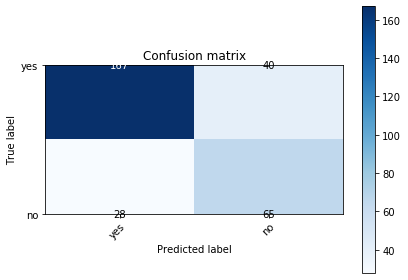

In [60]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(test['Outcome'], p, classes=['yes', 'no'],
                      title='Confusion matrix')

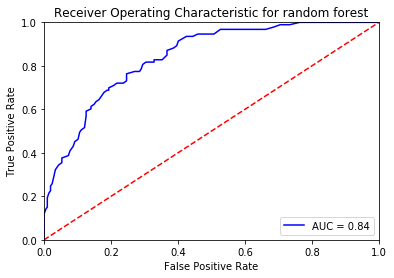

In [41]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(data)#x_test
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(target, preds)#y_test
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for random forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()